In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
def build_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    return model
cnn=build_cnn()

In [ ]:
# Example usage
data_dir = '/content/data'  # Replace with your dataset path
X, y = load_images(data_dir, max_images_per_dir=14)

if len(X) == 0:
    raise ValueError("No images were loaded. Please check the dataset structure and image formats.")

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Entering directory: /content/data/Normal
Processing directory: /content/data/Normal/Directory_13/series0024-Body with 3 images.
Processing directory: /content/data/Normal/Directory_13/series0042-Body with 20 images.
Processing directory: /content/data/Normal/Directory_13/series0028-Body with 8 images.
Processing directory: /content/data/Normal/Directory_13/series0003-Body with 40 images.
Processing directory: /content/data/Normal/Directory_13/series0075-Body with 1 images.
Processing directory: /content/data/Normal/Directory_13/series0031-Body with 60 images.
Processing directory: /content/data/Normal/Directory_13/series0069-Body with 1 images.
Processing directory: /content/data/Normal/Directory_13/series0029-Body with 1 images.
Processing directory: /content/data/Normal/Directory_13/series0501-unknown(1) with 3 images.
Processing directory: /content/data/Normal/Directory_13/series0051-Body with 3 images.
Processing directory: /content/data/Normal/Directory_13/series0020-Body with 40 

87/87 ━━━━━━━━━━━━━━━━━━━━ 16s 180ms/step
Confusion Matrix:
 [[1538   18]
 [  14 1206]]


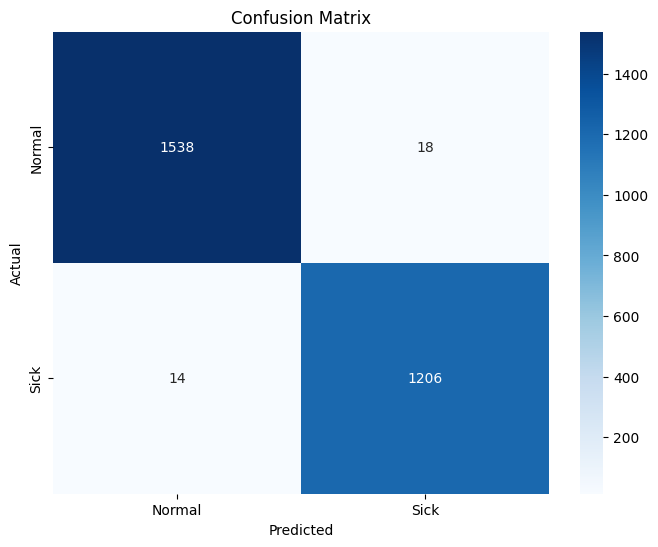

Classification Report:
               precision    recall  f1-score   support

      Normal       0.99      0.99      0.99      1556
        Sick       0.99      0.99      0.99      1220

    accuracy                           0.99      2776
   macro avg       0.99      0.99      0.99      2776
weighted avg       0.99      0.99      0.99      2776



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Step 6: Confusion Matrix and Recall
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Sick'], yticklabels=['Normal', 'Sick'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Normal', 'Sick'])
print("Classification Report:\n", report)